# 1.Объекты, классы и экземпляры классов
Любое значение в питоне - объект. Так же его можно назвать контейнером, который состоит из:

1) данных и состояния - атрибуты

2) поведения объекта - методов

In [ ]:
a = [1, 2, 3] # данные - элементы списка
a.append(4) # поведение

У объектов свое поведение, то есть есть разные методы. Например, методы строк и методы списков.
Каждый объект принадлежит определнному классу:

In [ ]:
type(4) # класс int

int

In [ ]:
type(4.5) # класс float

float

У классов есть множество экземпляров: у класса int это все целые числа и тд

Принадлежность объекта к классу можно проверить через `isinstance(экземпляр, класс)`

In [ ]:
isinstance(4, int)

True

In [ ]:
isinstance(4, object) # любое значение в питоне это объект

True

In [ ]:
isinstance(int, object) # любое значение в питоне это объект

True

In [ ]:
type(int) # тип класса int это тип, но это так же объект

type

Классы - шаблон для создания объектов. Например выше мы создали список **a**, добавив в него 3 элемента. За кулисами происходит наделение объекта **a** определенным поведением (сохранение данных с индексами, к **a** можно применять методы класса list).

По pep8 класс начинается с заглавной буквы, если слов несколько, то написание вида `CamelCase`

In [ ]:
class Car:
    pass

Car() # вызываем класс с (). На выходе экзмепляр класса

In [ ]:
a = Car()
a # а - объект класса Car

In [ ]:
type(a)

__main__.Car

In [ ]:
isinstance(a, Car)

True

Создадим новый объект класса: он будет другим, так как занимает другую ячейку памяти

In [ ]:
b = Car()
b

In [ ]:
class Car:
    model = 'BMW'
    engine = 1.6

In [ ]:
с = Car() # создадим новый экзмепляр класса, который хранит марку машины
с

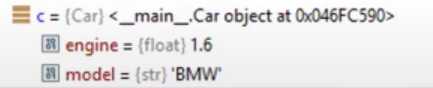

## Атрибуты класса
Это данные класса. Научимся к ним обращаться, изменять и удалять их

In [ ]:
class Person:
    name = 'Dima'
    age = 25
Person # класс определился

__main__.Person

In [ ]:
Person.name # обратились к атрибуту

'Dima'

In [ ]:
Person.sex

AttributeError: ignored

In [ ]:
# рассмотрим какие есть атрибуты
Person.__dict__

mappingproxy({'__module__': '__main__',
              'name': 'Dima',
              'age': 25,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              '__annotations__': {}})

Констркция выше называется `mapping proxy` - похоже на словарь. Тут есть служебная информация и атрибуты класса, которые записаны в виде строк. Так же можно узнать, есть ли атрибут в классе через **geattr(класс, атрибут)**

In [ ]:
getattr(Person, 'name') # название атрибута через строку

'Dima'

In [ ]:
getattr(Person, 'sex', 'такого нет') # 3 параметр помогает избегать ошибок attribute error

'такого нет'

In [ ]:
Person.sex = 'male' # динамическое создание атрибута
getattr(Person, 'sex')

'male'

создать (изменить) атрибут можно не только динамически, но и через функцию **setattr(класс, имя атрибута, значение)**

In [ ]:
setattr(Person, 'city', 'Moscow')

In [ ]:
Person.city

'Moscow'

In [ ]:
setattr(Person, 'city', 'Minsk')
Person.city

'Minsk'

In [ ]:
Удалить атрибуты класса можно через del или через delattr()

In [ ]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              'name': 'Dima',
              'age': 25,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              '__annotations__': {},
              'sex': 'male',
              'city': 'Minsk'})

In [ ]:
del Person.city

In [ ]:
delattr(Person, 'sex')

In [ ]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              'name': 'Dima',
              'age': 25,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              '__annotations__': {}})

Рассмотрим, как добавление атрибута влияет на атрибуты экземпляра класса

In [ ]:
pers = Person() # создали экземпляр класса

In [ ]:
Person.salary = 200 # в экземпляр класса динамически добавится атрибут salary

То же самое будет при изменении/удалении атрибутов класса. Однако, если создать атрибут в экземпляре класса, то в самом классе и других экземплярах его не будет

In [ ]:
pers.country = 'Russia'

In [ ]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              'name': 'Dima',
              'age': 25,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None,
              '__annotations__': {},
              'salary': 200})

In [ ]:
pers.__dict__

{'country': 'Russia'}

In [ ]:
dir(pers)[-3:]

['country', 'name', 'salary']

setattr() используется реже, чем динамическое создание атрибутов. Но если надо добавить много атрибутов, то делают так:

In [ ]:
class Empty:
    pass

my_list = [
    ('apple', 23),
    ('banana', 80),
    ('cherry', 13),
    ('date', 10),
    ('elderberry', 4),
    ('fig', 65),
    ('grape', 5),
    ('honeydew', 7),
    ('kiwi', 1),
    ('lemon', 10)]

for i in my_list:
    setattr(Empty, i[0], i[1])

In [ ]:
Empty.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'Empty' objects>,
              '__weakref__': <attribute '__weakref__' of 'Empty' objects>,
              '__doc__': None,
              'apple': 23,
              'banana': 80,
              'cherry': 13,
              'date': 10,
              'elderberry': 4,
              'fig': 65,
              'grape': 5,
              'honeydew': 7,
              'kiwi': 1,
              'lemon': 10,
              '__annotations__': {}})

## Задача

В вашем распоряжении класс Person, у которого имеется 7 атрибутов.

Программа будет принимать на вход произвольное количество слов в одну строку, разделенных пробелом. Ваша задача проверить, является ли каждое из введенных слов названием атрибута. Регистр слов значения не имеет.

Нужно вывести в каждой отдельной строке введенные слова по порядку и напротив через дефис указать, нашлось ли свойство с таким именем или нет (вывести YES или NO)

In [ ]:
class Person:
    name = "John Smith"
    age = 30
    gender = "male"
    address = "123 Main St"
    phone_number = "555-555-5555"
    email = "johnsmith@example.com"
    is_employed = True

In [ ]:
b = input().split()
for i in b:
    try:
        getattr(Person, i.lower())
        print(f'{i}-YES')
    except:
        print(f'{i}-NO')

age date address
age-YES
date-NO
address-YES


Решения других:

In [ ]:
for word in input().split():
    print(word, end='-')
    print('YES' if hasattr(Person, word.lower()) else 'NO')

In [ ]:
for word in input().split():
    if hasattr(Person, word.lower()):
        print(f"{word}-YES")
    else:
        print(f"{word}-NO")

In [ ]:
hasattr(Person, 'date')

False

# 2. Атрибуты экземпляра класса
Результатом вызова класса является экземпляр класса, который можно положить в переменную

In [1]:
class Car:
    model = 'BMW'
    engine = 1.6

In [2]:
a1, a2 = Car(), Car()

In [3]:
Car.__dict__

mappingproxy({'__module__': '__main__',
              'model': 'BMW',
              'engine': 1.6,
              '__dict__': <attribute '__dict__' of 'Car' objects>,
              '__weakref__': <attribute '__weakref__' of 'Car' objects>,
              '__doc__': None})

In [4]:
a1.model

'BMW'

In [5]:
a2.model

'BMW'

In [6]:
a1.__dict__ # атрибутов нет в экземпляре

{}

In [7]:
# добавим новый атрибут в экземпляр
a1.seat = 4

In [8]:
a1.__dict__

{'seat': 4}

In [9]:
# в другом экземпляре и самом классе seat не будет
a2.__dict__

{}

In [10]:
a1.model = 'Lada'

In [11]:
a1.model

'Lada'

In [12]:
Car.model = 'BMW'

In [ ]:
a1.model # у экземпляра все равно сохранится старый атрибут

'Lada'

Каждый экземпляр класса представляет из себя пространство имен: у а1 это seat и model. Однако класс Car так же имеет атрибуты, которые могут совпадать с атрибутами экземпляра. При обращении к атрибуту экземпляра класса питон сначала ищет этот атрибут внутри экземпляра, а уже потом обращается к атрибутам класса

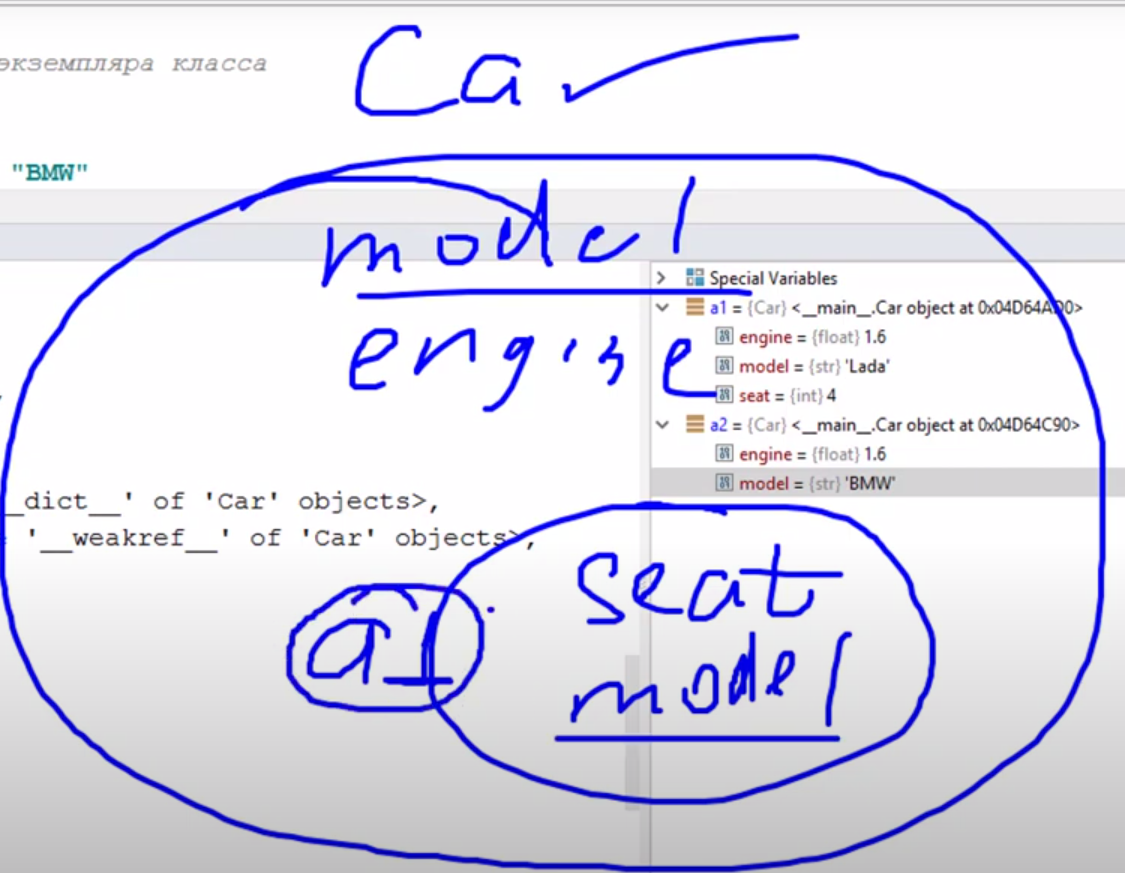

Однако, если создать новый атрибут в самом классе, то они автоматом добавятся в экземпляры класса

In [15]:
Car.model = 'Nissan'

In [16]:
a1.model # но в пространстве имен экземпляра изменений не будет, тк она локальная

'Lada'

In [17]:
a2.model

'Nissan'

In [87]:
delattr(a1, 'model') # удалим локальный атрибут экземпляра

In [88]:
a1.model # теперь вместо локального атрибута атрибут класса

'Nissan'

Вывод: 
- атрибуты класса относятся только к самому классу, и при создании  экземпляра класса (ЭК) эти атрибуты не создаются в самом ЭК, а получают ссылку на атрибут класса. 
- при создании атрибута в ЭК этот атрибут будет локальным, то есть он будет в пространстве имен ЭК
- если удалить локальный атрибут, но этот атрибут есть в самом классе, то локальный атрибут удалится, но останется глобальный атрибут класса

## Задачи
Ниже определен пустой класс SuperHero. Ваша задача  создать два ЭК и сохранить их в переменные batman и superman

Для ЭК, хранящегося в переменной batman, необходимо создать

атрибут can_fly со значением False
атрибут damage со значением 175
Для ЭК, хранящегося в переменной superman, необходимо создать

атрибут can_fly со значением True
атрибут damage со значением 285
атрибут alter_ego со значением 'Кларк Кент'

In [89]:
class SuperHero:
    pass

batman, superman = SuperHero(), SuperHero()
batman.can_fly = False
batman.damage = 175
superman.can_fly = True
superman.damage = 285
superman.alter_ego = 'Кларк Кент'

Имеется пустой класс Config. Ваша задача написать функцию create_instance, которая принимает на вход положительное число N. Функция должна создать ЭК , создать у него N атрибутов и вернуть в качестве ответа полученный ЭК.

In [134]:
class Config:
    pass
def create_instance(N: int):
    object = Config()
    for i in range(1, N+1):
        setattr(object, f'attribute{i}', f'value{i}')
    return object

In [135]:
config_10 = create_instance(10)

In [137]:
config_10.__dict__

{'attribute1': 'value1',
 'attribute2': 'value2',
 'attribute3': 'value3',
 'attribute4': 'value4',
 'attribute5': 'value5',
 'attribute6': 'value6',
 'attribute7': 'value7',
 'attribute8': 'value8',
 'attribute9': 'value9',
 'attribute10': 'value10'}

In [141]:
isinstance(config_10, Config)

True

Решения других

In [ ]:
def create_instance(n: int) -> Config:
    obj = Config()
    for index in range(1, n + 1):
        obj.__setattr__(f'attribute{index}', f'value{index}')
    return obj

def create_instance(n: int) -> Config:
    obj = Config()
    [setattr(obj, f'attribute{i}', f'value{i}') for i in range(1, n + 1)]
    return obj

def create_instance(num):
    obj = Config()
    for i in range(1,num+1):
        obj.__dict__[f'attribute{str(i)}'] = f'value{str(i)}'

    return obj

# Функция как атрибут класса

In [144]:
class Car:
    model = 'Honda'
    engine = 2.0
    def drive():
        print('Go go go')

In [145]:
Car.__dict__

mappingproxy({'__module__': '__main__',
              'model': 'Honda',
              'engine': 2.0,
              'drive': <function __main__.Car.drive()>,
              '__dict__': <attribute '__dict__' of 'Car' objects>,
              '__weakref__': <attribute '__weakref__' of 'Car' objects>,
              '__doc__': None,
              '__annotations__': {}})

In [146]:
Car.drive() #  должны быть скобки - это оператор вызова

Go go go


In [147]:
Car.drive # обращение к объекту. Это функция

<function __main__.Car.drive()>

In [148]:
getattr(Car, 'drive') # обращение к атрибуту

<function __main__.Car.drive()>

In [149]:
getattr(Car, 'drive')() # оператор вызова

Go go go


In [ ]:
# Для экземпляра класса это баунд метод. В классе это функция
c = Car()
c.drive

<bound method Car.drive of <__main__.Car object at 0x7c8f93f507c0>>

In [153]:
c.drive()

TypeError: ignored

### Выводы:

- при таком определении функции в классе (которое вообще не принято) ее нельзя вызвать через экземпляр класса. Будет ошибка, так как в функцию класса без аргумента добавляется аргумент (что за аргумент? ответ в следующей теме)
- чтобы все же вызвать функцию, которая определена таким образом, нужен декоратор `@staticmethod`
- так же можно вызвать без декоратора через `__class__`

In [154]:
class Car:
    model = 'Honda'
    engine = 2.0
    @staticmethod
    def drive():
        print('Go go go')

c = Car()
c.drive()

Go go go


In [155]:
class Car:
    model = 'Honda'
    engine = 2.0

    def drive():
        print('Go go go')

c = Car()
c.__class__.drive()

Go go go
